In [35]:
from paths import annotations_path
from statistics import mean, quantiles
import matplotlib.pyplot as plt
import pandas as pd
import json

In [36]:
# Define data paths
base = "/Users/alikianagnostopoulou/Data/vizwiz/annotations/" # ???
train_path = base + "train.json"
val_path = base + "val.json"

In [55]:
# Define output paths -- COLOURS
cluster_path = "out.csv"
pic1 = "outputs/colours.jpg"
first_json = "outputs/colours_v1.json"
second_json = "outputs/colours_v2.json" 
in_title = "incl."
pic2 = "outputs/colours_sents.jpg"

In [38]:
# Define output paths -- NO COLOURS
# cluster_path = "out_nocolours.csv"
# pic1 = "outputs/nocolours.jpg"
# first_json = "outputs/nocolours_v1.json"
# second_json = "outputs/nocolours_v2.json"
# in_title = "excl."
# pic2 = "outputs/nocolours_sents.jpg"

In [56]:
# Save keywords from 
keywords = dict()
df = pd.read_csv(cluster_path)
columns = list(df.columns)
for col in columns:
    if col not in keywords:
        keywords[col] = list()
    kws = df[col].tolist()
    for k in kws:
        if type(k) == str: # there are empty entries for the sake of the csv formatting
            keywords[col].append(k)

In [57]:
X, Y = list(), list()

for k, v in keywords.items():
    X.append(k)
    Y.append(len(v))

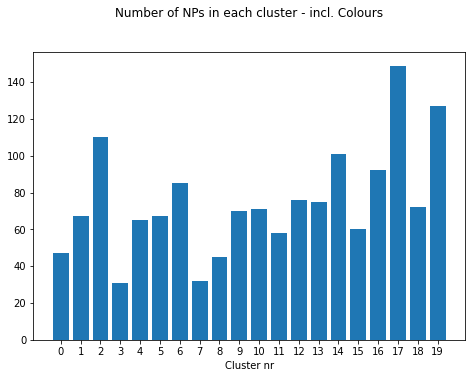

In [58]:
# Figure > BUG
fig = plt.figure()
ax = fig.add_axes([.1, .1, .75, .75])  # ax = fig.add_axes([0,0,1,1])
ax.set_title(f"Number of NPs in each cluster - {in_title} Colours", y=1.1)
ax.set_xlabel("Cluster nr")
ax.bar(X, Y)
fig.savefig(pic1)

In [59]:
with open(train_path, 'r') as jsonfile:
    traindata = json.load(jsonfile)

In [60]:
# Save captions with their image_id
captions = dict()
for cap in traindata["annotations"]:
    i = cap["image_id"]; c = cap["caption"]
    if i not in captions:
        captions[i] = list()
    captions[i].append(c)

captions[0]

['ITS IS A BASIL LEAVES CONTAINER ITS CONTAINS THE NET WEIGHT TOO.',
 'A green and white plastic condiment bottle containing Basil leaves.',
 'Quality issues are too severe to recognize visual content.',
 'A bottle of spices in a plastic container laying on a surface.',
 'some basil leaves in a container on a counter']

In [61]:
cluster2image = dict()

# Coding from hell
for id, sent in captions.items():
    # for every image, create dict
    cluster2image[id] = dict()
    # for every sentence of the image...
    for s in sent:
        # look into keywords
        for k, v in keywords.items():
            # for each keyword...
            for item in v:
                # is the keyword in the sentence?
                if item in s:
                    # add cluster name to dict!
                    if k not in cluster2image[id]:
                        cluster2image[id][k] = 0
                    cluster2image[id][k] += 1
        

In [62]:
# Save first version!
with open(first_json, 'w') as jsonfile:
    json.dump(cluster2image, jsonfile, indent=4, sort_keys=True)

In [63]:
# BUG
for img in cluster2image:
    if cluster2image[img] == dict():
        print(img)

21238


In [65]:
def keySwithmaxval(d):
    itemMaxVal = max(d.items(), key=lambda x: x[1])
    listOfKeys = list()
    for k, v in d.items():
        if v == itemMaxVal[1]:
            listOfKeys.append(k)
    return listOfKeys

In [66]:
# Remove all insignificant ones
cluster2image_c = dict()
for img in cluster2image:
    # fill empty dicts!
    if cluster2image[img] != dict():
        cluster2image_c[img] = keySwithmaxval(cluster2image[img])

In [67]:
# Is there any empty dict?
many = list()
for img in cluster2image_c:
    if len(cluster2image_c[img]) == 0:
        many.append(img)

len(many) == 0

True

In [68]:
# Save second version
with open(second_json, 'w') as jsonfile:
    json.dump(cluster2image_c, jsonfile, indent=4, sort_keys=True)

In [69]:
# Visualize what's going on

actual_counts = dict()

for k, v in cluster2image_c.items():
    for cluster in v:
        if cluster not in actual_counts:
            actual_counts[cluster] = 0
        actual_counts[cluster] += 1


In [70]:
X, Y = list(), list()

for k, v in actual_counts.items():
    X.append(int(k))
    Y.append(v)

Z = [x for _,x in sorted(zip(X,Y))]
X = sorted(X)

for i in range(len(X)):
    X[i] = str(X[i])

print(X); print(Y); print(Z)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19']
[1458, 1556, 965, 8103, 3969, 1588, 594, 377, 1142, 237, 608, 682, 3037, 1791, 1678, 1066, 138, 367, 514, 79]
[682, 367, 594, 79, 1678, 965, 8103, 237, 377, 3037, 3969, 138, 1458, 1791, 514, 608, 1588, 1066, 1556, 1142]


In [71]:
# STATISTICS

mean_Y = mean(Z)
quantiles_Y = quantiles(Z)

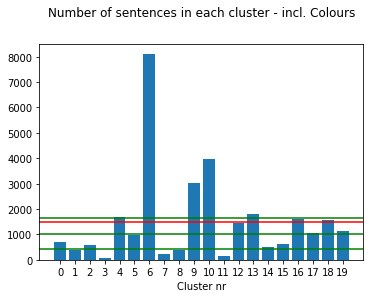

In [72]:
# Figure > BUG
fig = plt.figure()
ax = fig.add_axes([.1, .1, .75, .75])
ax.set_title(f"Number of sentences in each cluster - {in_title} Colours", y=1.1)
ax.set_xlabel("Cluster nr")
ax.axhline(mean_Y, color='r')
for l in quantiles_Y:
    ax.axhline(l, color='g')
ax.bar(X, Z)
fig.savefig("colours_sents.jpg")

In [ ]:
"""
    Rules:
        - everything above median leaves, if possible
        - everything below 
"""